In [1]:
import pandas as pd
df=pd.read_csv("credit_1.csv")

In [2]:
x=df.drop("Class",axis=1)
y=df["Class"]

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x["Time"]=scaler.fit_transform(x[["Time"]])
x["Amount"]=scaler.fit_transform(x[["Amount"]])
print(x)


            Time        V1        V2        V3        V4        V5        V6  \
0      -2.000786 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1      -2.000786  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2      -2.000760 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3      -2.000760 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4      -2.000735 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...          ...       ...       ...       ...       ...       ...       ...   
227842  1.675729 -1.781954  2.062680 -3.758871 -1.801001 -0.084365  1.919610   
227843  1.675729 -0.061507  1.024900 -0.170060 -0.263220  0.982164 -1.162749   
227844  1.675779  2.050034 -0.103557 -1.204713  0.207198  0.108850 -0.665621   
227845  1.675805  1.914027 -0.490068 -0.326111  0.604711 -0.850136 -0.736319   
227846  1.675830  2.152696 -0.036161 -2.231811  0.091766  0.537612 -1.368103   

              V7        V8        V9  .

<Axes: xlabel='Class', ylabel='count'>

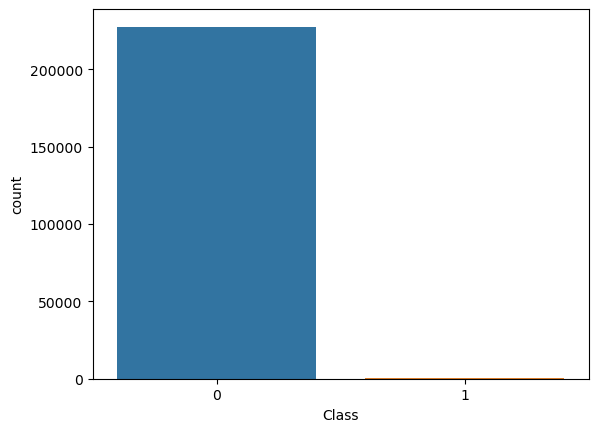

In [4]:
import seaborn as sns
sns.countplot(x=df["Class"])

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
#x_test=scaler.transform(x_test)

In [6]:
import numpy as np
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train_resample,y_train_resample=smote.fit_resample(x_train,y_train)
r=x_train_resample

<Axes: xlabel='Class', ylabel='count'>

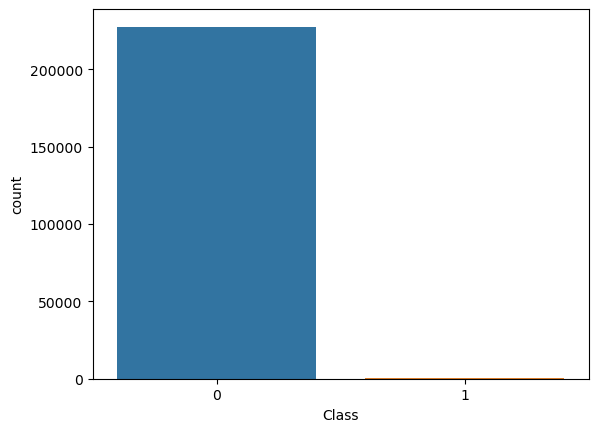

In [7]:
import seaborn as sns
sns.countplot(x=df["Class"])

In [8]:
df.shape

(227847, 31)

In [9]:
r.shape

(363874, 30)

In [10]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# # Determine the optimal number of clusters using silhouette score
# max_clusters = 5
# best_score = -1
# best_k = 2
# for k in range(2, max_clusters + 1):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     cluster_labels = kmeans.fit_predict(x_train_resample)
#     score = silhouette_score(x_train_resample, cluster_labels)
#     if score > best_score:
#         best_score = score
#         best_k = k

# # Train K-means with the optimal number of clusters
# kmeans = KMeans(n_clusters=best_k, random_state=42)
# cluster_labels = kmeans.fit_predict(x_train_resample)

# # Identify potential fraud clusters
# fraud_cluster = kmeans.cluster_centers_[cluster_labels == cluster_labels.max()]

# # Print potential fraud clusters
# print("Potential Fraud Clusters:")
# for i, cluster in enumerate(fraud_cluster):
#     print(f"Cluster {i+1}: Amount = {cluster[0]}, Time = {cluster[1]}")


In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Initialize and fit K-means clustering model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x)

# Get cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_   

# # Plot the clusters
plt.figure(figsize=(8, 6))
# Convert DataFrame to numpy array
x_array = x.values

# Plot the clusters
plt.scatter(x_array[:, 0], x_array[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'x' is not defined